<a href="https://colab.research.google.com/github/Farah-S/sonar-rock-classification/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from pandas.plotting import parallel_coordinates
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
# To evaluate our model
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
sonar=pd.read_csv("/content/drive/MyDrive/Year 3/2nd semester /Selected Topics/sonar.csv")
sonar.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [188]:
X = sonar.copy()

labels=  X.pop('Class')

# Initialize the Label Encoder.
le = LabelEncoder()

# Encode the categories
sonar['Class_enc'] = le.fit_transform(sonar['Class'])

y=sonar['Class_enc']

print(X)
print(y)
print(labels)

     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0         0.0200       0.0371       0.0428       0.0207       0.0954   
1         0.0453       0.0523       0.0843       0.0689       0.1183   
2         0.0262       0.0582       0.1099       0.1083       0.0974   
3         0.0100       0.0171       0.0623       0.0205       0.0205   
4         0.0762       0.0666       0.0481       0.0394       0.0590   
..           ...          ...          ...          ...          ...   
203       0.0187       0.0346       0.0168       0.0177       0.0393   
204       0.0323       0.0101       0.0298       0.0564       0.0760   
205       0.0522       0.0437       0.0180       0.0292       0.0351   
206       0.0303       0.0353       0.0490       0.0608       0.0167   
207       0.0260       0.0363       0.0136       0.0272       0.0214   

     attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0         0.0986       0.1539       0.1601       0.3109  

Feature selection

['attribute_4', 'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8', 'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12', 'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16', 'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20', 'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24', 'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28', 'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32', 'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36', 'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40', 'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44', 'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48']
45
0.8076923076923077
Confusion Matrix

[[22  6]
 [ 4 20]]


Classification Report

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.77      0.83      0.80        24

    accuracy                         

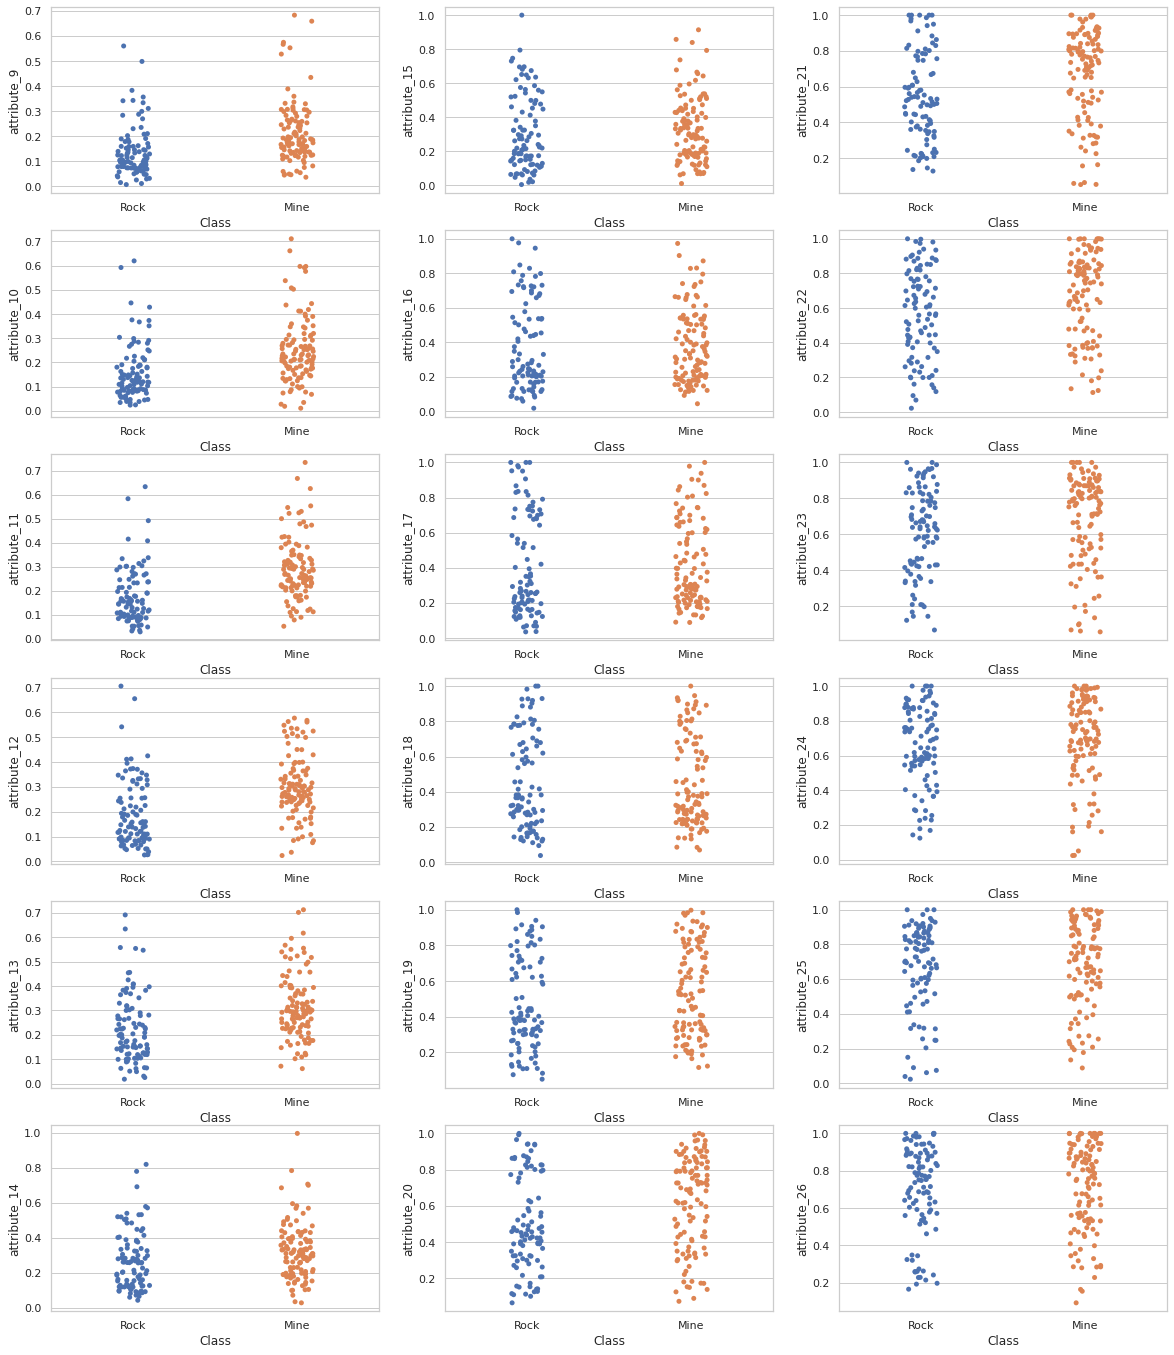

In [189]:
#1st: calculate the variance for each column 
#2nd: Features with a training-set variance lower than this threshold will be removed
for z in np.arange(0.002, 0.07000, 0.002):
  
  v_threshold = VarianceThreshold(threshold=z)
  v_threshold.fit(X)
#print(v_threshold.get_support())
  allfeatures=v_threshold.get_support()
  selected_features=[]
  j=1
  for i in allfeatures:
    if(i==True):
      selected_features.append('attribute_' + str(j))
    j+=1

  print(selected_features)
  # for i in selected_features:
  #   print(sonar[i])
  print(len(selected_features))
  
  columns=selected_features
  df = pd.read_csv("/content/drive/MyDrive/Year 3/2nd semester /Selected Topics/sonar.csv", usecols=selected_features)
  # print(df.head())
  x2=df.copy()
  df['Class_enc'] = le.fit_transform(sonar['Class'])

  y2=df['Class_enc']

  # print(X)
  # print(y)
  if(z==0.008):
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(6, 3,sharey=False,sharex=False, figsize=(20,24))
    x=0
    for i in range(0,3):
      for j in range(0,6):
        if x>=18:
          break;
        sns.stripplot(x=sonar["Class"], y=sonar[selected_features[x]], data=sonar, ax=axes[j,i])
        x+=1
      if x>=18:
          break;



  #using some features
  df_train, df_test, dfy_train, dfy_test = train_test_split(x2, y2, test_size=0.25, random_state=2, stratify=y2)

    # print(df_train)
  # print(dfy_train)
  model=GaussianNB().fit(df_train, dfy_train)
  y_pred=model.predict(df_test)
  # print(model.predict_proba(X_test))
  print(model.score(df_test, dfy_test))

  # Print the Confusion Matrix
  cm = confusion_matrix(dfy_test, y_pred)
  print("Confusion Matrix\n")
  print(cm)

  # Print the Classification Report
  cr = classification_report(dfy_test, y_pred)
  print("\n\nClassification Report\n")
  print(cr)

Data visualization for the selected features

['attribute_4', 'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8', 'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12', 'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16', 'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20', 'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24', 'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28', 'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32', 'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36', 'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40', 'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44', 'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48']
45
0.6730769230769231
Confusion Matrix

[[18 10]
 [ 7 17]]


Classification Report

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.63      0.71      0.67        24

    accuracy                         

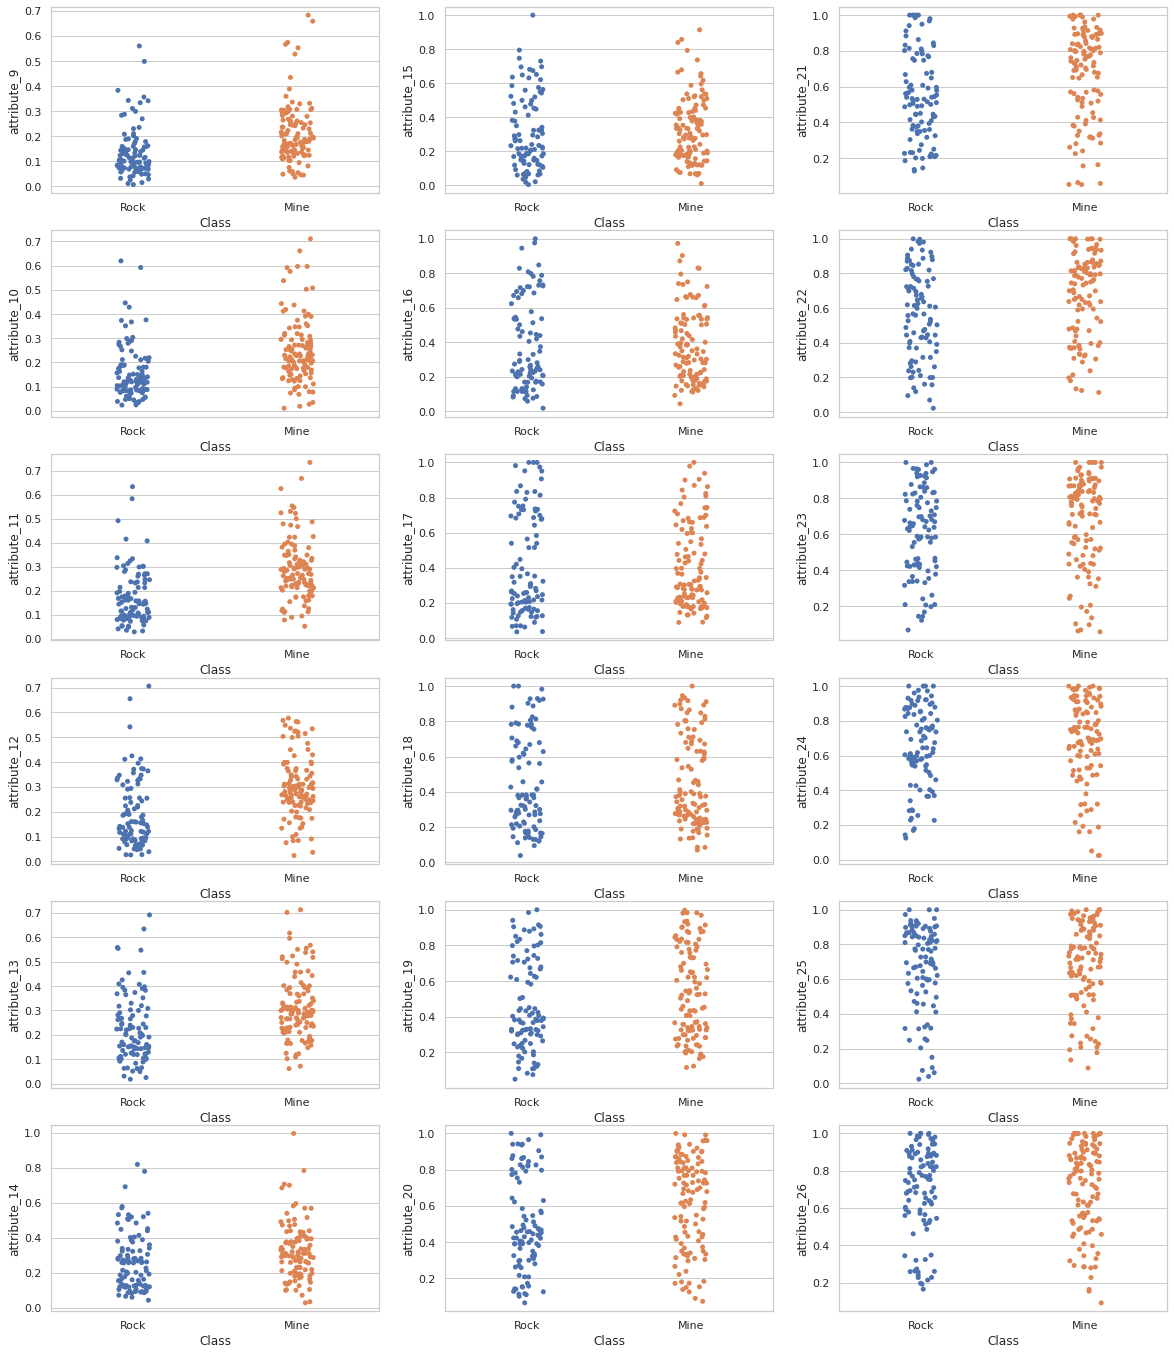

In [190]:
#1st: calculate the variance for each column 
#2nd: Features with a training-set variance lower than this threshold will be removed
for z in np.arange(0.002, 0.07000, 0.002):
  
  v_threshold = VarianceThreshold(threshold=z)
  v_threshold.fit(X)
#print(v_threshold.get_support())
  allfeatures=v_threshold.get_support()
  selected_features=[]
  j=1
  for i in allfeatures:
    if(i==True):
      selected_features.append('attribute_' + str(j))
    j+=1

  print(selected_features)
  # for i in selected_features:
  #   print(sonar[i])
  print(len(selected_features))
  
  columns=selected_features
  df = pd.read_csv("/content/drive/MyDrive/Year 3/2nd semester /Selected Topics/sonar.csv", usecols=selected_features)
  # print(df.head())
  x2=df.copy()
  df['Class_enc'] = le.fit_transform(sonar['Class'])

  y2=df['Class_enc']

  # print(X)
  # print(y)
  if(z==0.008):
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(6, 3,sharey=False,sharex=False, figsize=(20,24))
    x=0
    for i in range(0,3):
      for j in range(0,6):
        if x>=18:
          break;
        sns.stripplot(x=sonar["Class"], y=sonar[selected_features[x]], data=sonar, ax=axes[j,i])
        x+=1
      if x>=18:
          break;


  #using some features
  df_train, df_test, dfy_train, dfy_test = train_test_split(x2, y2, test_size=0.25, random_state=2, stratify=y2)

    # print(df_train)
  # print(dfy_train)
  model=ComplementNB().fit(df_train, dfy_train)
  y_pred=model.predict(df_test)
  # print(model.predict_proba(X_test))
  print(model.score(df_test, dfy_test))

  # Print the Confusion Matrix
  cm = confusion_matrix(dfy_test, y_pred)
  print("Confusion Matrix\n")
  print(cm)

  # Print the Classification Report
  cr = classification_report(dfy_test, y_pred)
  print("\n\nClassification Report\n")
  print(cr)

Without feature selection



With feature selection

In [191]:
#stratify: split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
#Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time the code is run

#using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)

In [192]:
model=GaussianNB().fit(X_train, y_train)

y_pred=model.predict(X_test)
# print(model.predict_proba(X_test))
print(model.score(X_test, y_test))

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

0.8076923076923077
Confusion Matrix

[[21  7]
 [ 3 21]]


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.75      0.88      0.81        24

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.82      0.81      0.81        52

